# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import scipy.stats as sts

# File to Load (Remember to change these)
city_data_to_load = '../UNCBC-HW5-PyBer/Resources/city_data.csv'
ride_data_to_load = "../UNCBC-HW5-PyBer//Resources/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [4]:
# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type
total_rides = []

for i in range(0, len(pyber_df['type'].unique())):
    n = pyber_df['ride_id'][pyber_df['type']==pyber_df['type'].unique()[i]].count()
    total_rides.append(n)
    print(f'There were {n} rides in {pyber_df["type"].unique()[i]} cites.')

total_rides

There were 1625 rides in Urban cites.
There were 625 rides in Suburban cites.
There were 125 rides in Rural cites.


[1625, 625, 125]

In [6]:
# 2. Get the total drivers for each city type

total_drivers = []

for i in range(0, len(pyber_df['type'].unique())):
    n = city_df['driver_count'][city_df['type']==city_df['type'].unique()[i]].sum()
    total_drivers.append(n)
    print(f'There were {n} drivers in {city_df["type"].unique()[i]} cites.')

total_drivers



There were 2405 drivers in Urban cites.
There were 490 drivers in Suburban cites.
There were 78 drivers in Rural cites.


[2405, 490, 78]

In [7]:
pyber_df.groupby(['type'])['driver_count'].sum()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [8]:
#  3. Get the total amount of fares for each city type
total_fares = []

for i in range(0, len(pyber_df['type'].unique())):
    n = pyber_df['fare'][pyber_df['type']==pyber_df['type'].unique()[i]].sum()
    total_fares.append(n)
    print(f'There were ${n} (USD) collected in {pyber_df["type"].unique()[i]} cites.')


total_fares

There were $39854.380000000005 (USD) collected in Urban cites.
There were $19356.33 (USD) collected in Suburban cites.
There were $4327.929999999999 (USD) collected in Rural cites.


[39854.380000000005, 19356.33, 4327.929999999999]

In [9]:
#  4. Get the average fare per ride for each city type. 
avg_fares_per_ride = []

for i in range(0, len(pyber_df['type'].unique())):
    n = pyber_df['fare'][pyber_df['type']==pyber_df['type'].unique()[i]].sum()/total_rides[i]
    avg_fares_per_ride.append(n)
    print(f'There was on average ${n:.2f} (USD) collected per ride in {pyber_df["type"].unique()[i]} cites.')


avg_fares_per_ride

There was on average $24.53 (USD) collected per ride in Urban cites.
There was on average $30.97 (USD) collected per ride in Suburban cites.
There was on average $34.62 (USD) collected per ride in Rural cites.


[24.52577230769231, 30.970128000000003, 34.623439999999995]

In [10]:
# 5. Get the average fare per driver for each city type. 
avg_fares_per_driver = []

for i in range(0, len(pyber_df['type'].unique())):
    n = pyber_df['fare'][pyber_df['type']==pyber_df['type'].unique()[i]].sum()/total_drivers[i]
    avg_fares_per_driver.append(n)
    print(f'There was on average ${n:.2f} (USD) collected per driver in {pyber_df["type"].unique()[i]} cites.')


avg_fares_per_driver


There was on average $16.57 (USD) collected per driver in Urban cites.
There was on average $39.50 (USD) collected per driver in Suburban cites.
There was on average $55.49 (USD) collected per driver in Rural cites.


[16.571467775467777, 39.50271428571429, 55.486282051282046]

In [11]:
#  6. Create a PyBer summary DataFrame. 

summary_df = pd.DataFrame(
    {
      'type': pyber_df['type'].unique(),
      'Total Rides':total_rides,
      'Total Drivers': total_drivers,
      'Total Fares': total_fares,
      'Average Fare per Ride':avg_fares_per_ride,
      'Average Fare per Driver':avg_fares_per_driver
    }
)


In [12]:
#  7. Cleaning up the DataFrame. Delete the index name

# set the index to type, sort by ascending total rides, and remove index name
summary_df = summary_df.set_index('type').sort_values('Total Rides')
summary_df.index.name=None



In [13]:
#  8. Format the columns.

# format columns with thousands separator and currency symbols
format_dict = {'Total Rides': '{:,}',
              'Total Drivers' : '{:,}',
              'Total Fares': '${0:,.2f}',
              'Average Fare per Ride': '${0:,.2f}',
              'Average Fare per Driver': '${0:,.2f}'
}

summary_df = summary_df.style.format(format_dict)

# show summary data frame
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [14]:
# 1. Read the merged DataFrame
pyber_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [15]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_df = pyber_df.groupby(['type','date']).sum()[['fare']]
fare_df



fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [16]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_df = fare_df.reset_index()
fare_df


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [17]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_pivot = fare_df.pivot(index='date', columns='type',values='fare')
fare_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

fare_pivot.index = pd.to_datetime(fare_pivot.index)

In [19]:
# 7. Check that the datatype for the index is datetime using df.info()

fare_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [20]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
day_fares = fare_pivot.resample('D').sum()
janToApril_dayfares = day_fares.loc['2019-01-01':'2019-04-28']
janToApril_dayfares

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,0.00,101.36,506.89
...,...,...,...
2019-04-24,0.00,220.72,312.64
2019-04-25,55.84,155.98,419.81
2019-04-26,0.00,132.45,330.98


In [21]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
janToApril_week_fares = janToApril_dayfares.resample('W').sum()
janToApril_week_fares

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


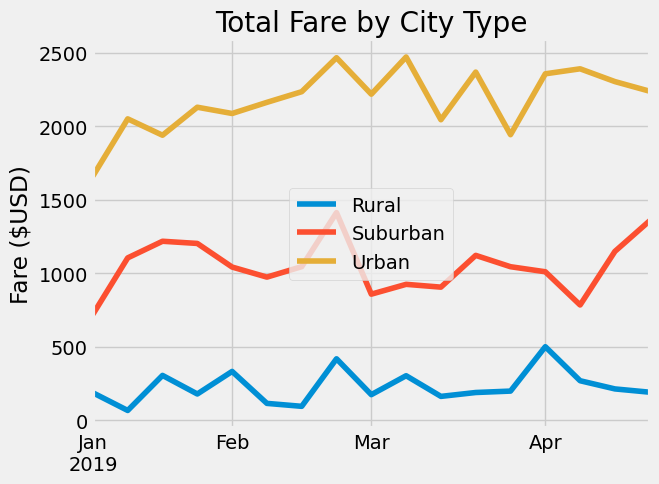

In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# df.plot method

janToApril_week_fares.plot()
plt.ylabel('Fare ($USD)')
plt.xlabel('')
plt.title('Total Fare by City Type')
plt.legend(loc = 'center')

plt.savefig('../UNCBC-HW5-PyBer//analysis/FareByTpe.png',bbox_inches='tight')
